## Ley de Zipf

Ley de Zipf dice que la frecuencia de ocurrencia de las palabras en un texto es proporcional al reciprocal del rango (en ocurrencia) de la palabra. Aqui quiero probar, si Ley de Zipf es aproximamente valido para articulo de wikipedia con mas palabras en espanol.

In [1]:
# We load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wikipedia
import re

In [2]:
# english wikipedia
wikipedia.set_lang("en")
book_title='Donald Trump'

In [3]:
# One of the longest articles on wikipedia is about "Donald Trump"
print(wikipedia.search(book_title))

['Donald Trump', 'Donald Trump Jr.', 'Family of Donald Trump', 'Donald Trump 2016 presidential campaign', 'Presidency of Donald Trump', 'Donald Trump sexual misconduct allegations', 'Second impeachment of Donald Trump', 'Social media use by Donald Trump', 'Ivana Trump', 'Political positions of Donald Trump']


In [4]:

wiki = wikipedia.page(book_title)
# Here we load the contents of the wikipedia page
text = wiki.content

In [5]:
# Some replacements
text = re.sub(r'==.*?==+', ' ', text) # removing headers
text = text.replace('\n', ' ') # removing line skips línea
text = text.replace("\'","'")
text = text.replace("—"," ")
text = text.replace("-"," ")
text = text.replace("U.S","US")
text = text.replace("D.C","DC")
text = text.replace("p.m","pm")
text = text.replace("a.m","am")
text = text.replace("."," ")
text = text.replace(" '"," ")
text = text.replace("' "," ")
"""Here is important to replace symbols with space """

'Here is important to replace symbols with space '

In [6]:
# Here we filter remaining symbols (except "'")
string_value = text
# We loop over characters in the text and rejoin the resulting list
string_value=''.join([x for x in string_value if ((x.isalnum() or x==' ' or x=="'") and not (x.isdigit()))])

# Now we can use .split() to obtain list of words
sv_list=string_value.split()
# Finally eliminate potential empty elements
s=sv_list
s=[x.lower() for x in s if (x!='' or x!="'")]

In [6]:
# We count the unique words using pandas data frame
word_counts=list(pd.DataFrame(s).value_counts())

In [7]:
# We get the list of words from index of the data frame
list_words=list(pd.DataFrame(s).value_counts().index)

In [8]:
# A rearangement of the list
words=[x[0] for x in list_words]

In [9]:
print('Number of unique words:',len(words))

Number of unique words: 3666


In [10]:
# Words in total:
print('Number of words in text:',len(s))

Number of words in text: 17131


In [11]:
# List of ranks of words
numbers=list(np.arange(1,len(words)+1))
# List of word counts in the text
number_counts=sorted(word_counts,reverse=True)
# Theoretical (ideal) expectation of word counts
number_theo=number_counts[0]*np.array([1/x for x in numbers])

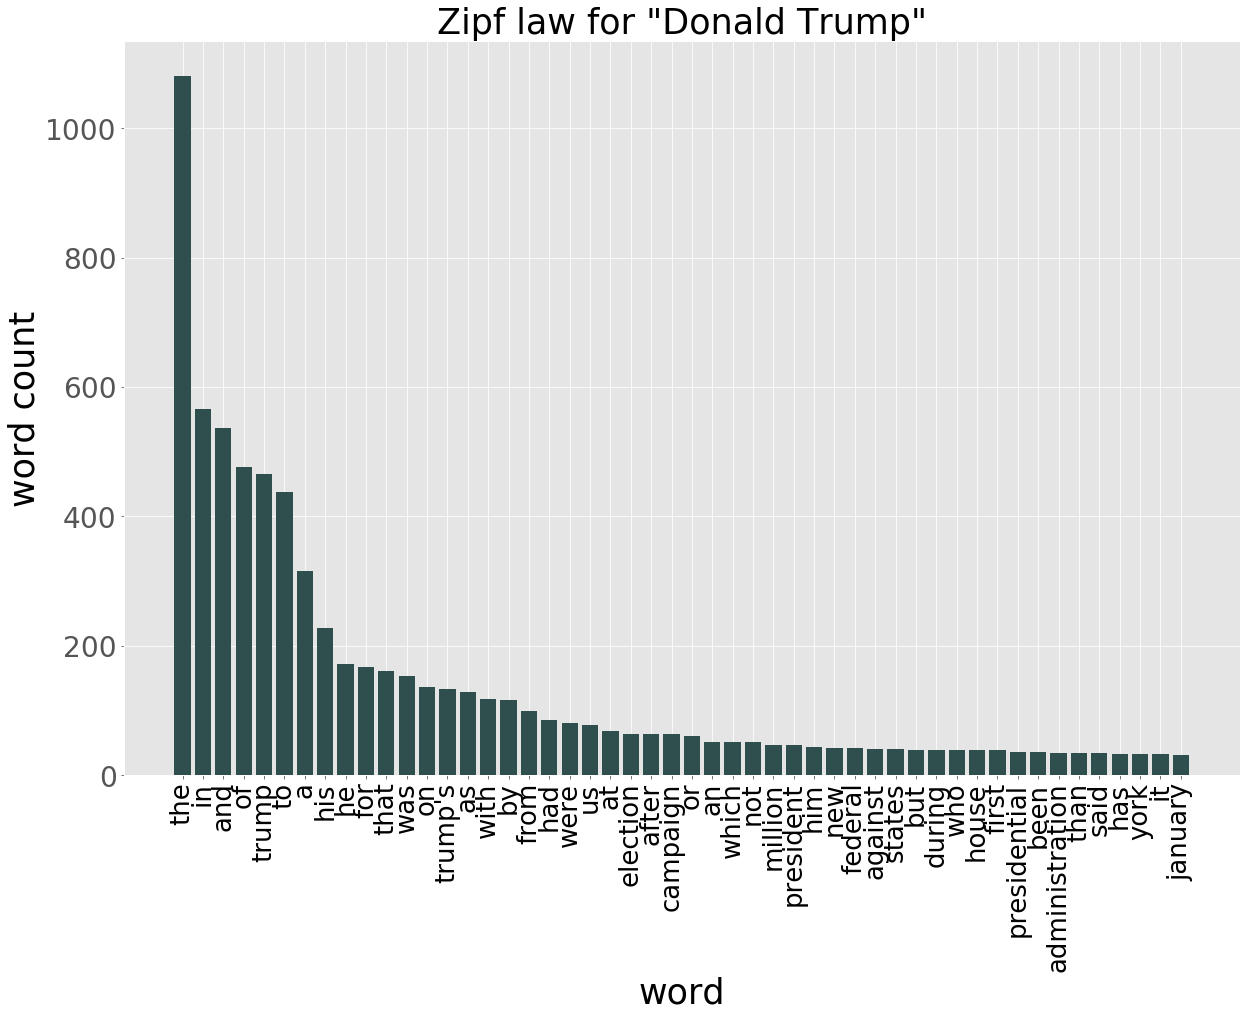

In [12]:
# ggplot style
plt.style.use("ggplot")
# A dataframe with words and word counts
words_df=pd.DataFrame(list(zip(words,word_counts)),columns=['word','count']).sort_values(by='count',ascending=False)

# A bar plot of words and word counts
# Figure size
plt.rcParams["figure.figsize"] = (20,15)
# Figure title
plt.title('Zipf law for "'+book_title+'"',fontsize=35)
# X axis label
plt.xlabel('word',fontsize=35,color='black')
# Y axis label
plt.ylabel('word count',fontsize=35,color='black')
# Tick options
plt.xticks(fontsize=26,rotation=90,color='black')
plt.yticks(fontsize=28)
# Plot
plt.bar(words_df['word'][0:50],words_df['count'][0:50],color='darkslategray')
# Style adjustment
plt.gcf().subplots_adjust(bottom=0.20)
# Saving the plot
plt.savefig(book_title+'_words.png')

slope -0.9013495839865607 displacement 7.152450502684125


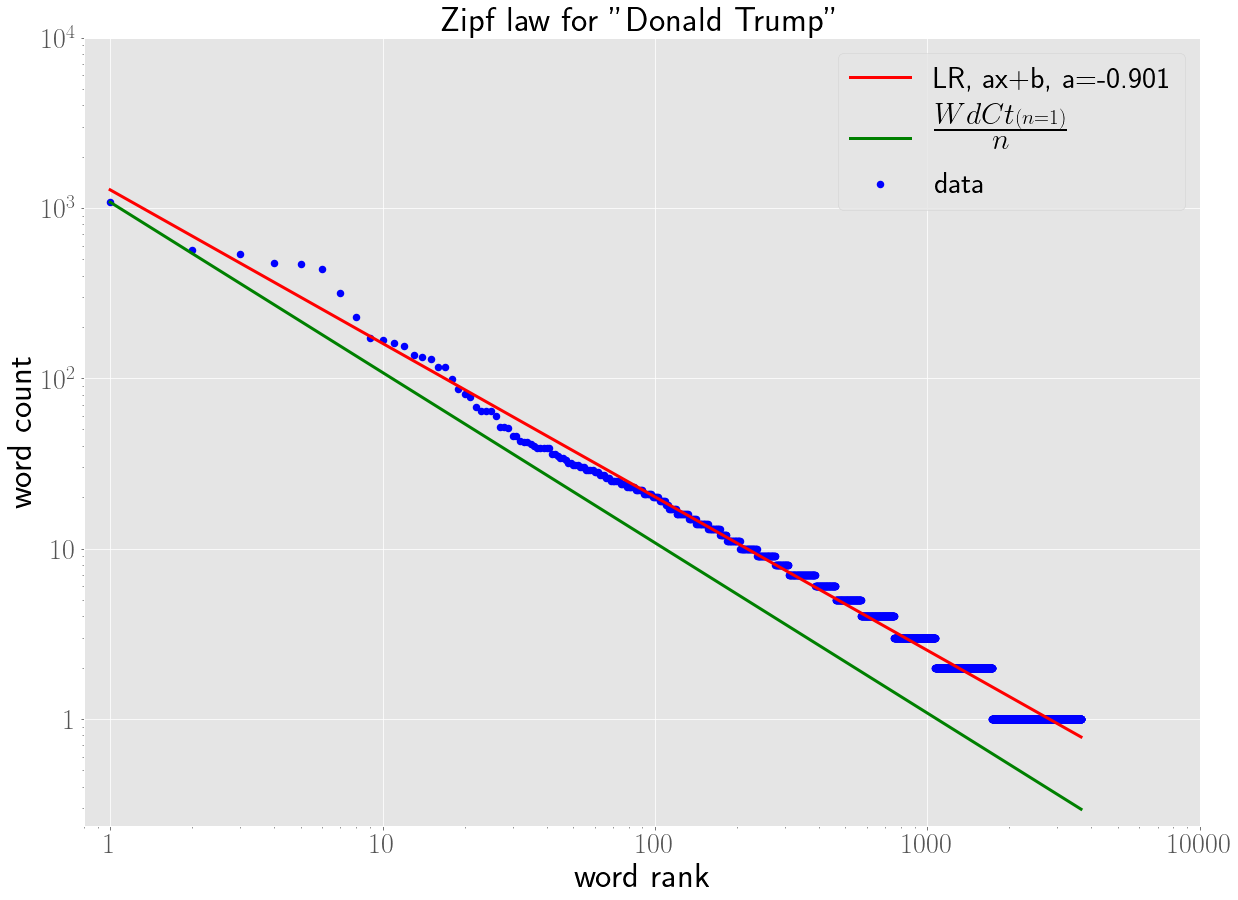

In [13]:
# Here we plot the Zipf's law plot

# To be able to use TeX
plt.rcParams['text.usetex'] = True

# ggplot style
plt.style.use("ggplot")

# Logarithmic values for the axes X, Y1 (experimental), Y2 (theoretical) to be able to do the linear regression and plot the values correctly
X = np.log(np.array(numbers))
Y1 = np.log(np.array(sorted(word_counts,reverse=True)))
Y2 = np.log(number_theo)

# Linear regression
m, b = np.polyfit(X, Y1, 1)

# Here we display the parameters of linear regression
print('slope',m,'displacement',b)

# Figure size
plt.rcParams["figure.figsize"] = (20,15)

# logarithmic axes
plt.xscale('log')
plt.yscale('log')

# The plots
plt.scatter(np.exp(X),np.exp(Y1),color='b',linewidth=1.5,label='data')
plt.plot(np.exp(X),np.exp(m*X+b),color='r',linewidth=3,label='LR, ax+b, a='+str(round(m,3)))
plt.plot(np.exp(X),np.exp(Y2),color='g',linewidth=3,label=r'$\frac{{\displaystyle WdCt}\left(n=1\right)}{\displaystyle n}$')
# Figure titles
plt.title('Zipf law for "'+book_title+'"',fontsize=35)
# The legend
plt.legend(fontsize=30)
# Axes names
plt.xlabel('word rank',fontsize=35,color='black')
plt.ylabel('word count',fontsize=35,color='black')
# Axes limits
plt.xlim(np.exp(X).min()*0.8,np.exp(X).max()*1.5)
plt.ylim(np.exp(m*X+b).min()*0.3,np.exp(m*X+b).max()*1.8)
# Bigger/different ticks
plt.xticks([1,10,100,1000,10000], labels=['$1$','$10$','$100$','$1000$','$10000$'],fontsize=28)
plt.yticks([1,10,100,1000,10000], labels=['$1$','$10$','$10^2$','$10^3$','$10^4$'],fontsize=28)
# Style option
plt.gcf().subplots_adjust(bottom=0.15)
# Saving the figure
plt.savefig(book_title+'_comp.png')